In [1]:
import pipeline as ppln

In [15]:
credit_df = ppln.load_credit_data('inputs/credit-data.csv')
zip_gdf = ppln.load_zipcode_area()

In [3]:
ppln.see_summary_stats(credit_df)

            PersonID  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
count   41016.000000      41016.000000                           41016.00000   
mean   115800.154598          0.161400                               6.37587   
std     28112.723511          0.367904                             221.61895   
min        22.000000          0.000000                               0.00000   
25%    106539.750000          0.000000                               0.03431   
50%    119901.500000          0.000000                               0.18973   
75%    134698.250000          0.000000                               0.66716   
max    149999.000000          1.000000                           22000.00000   

                age       zipcode  NumberOfTime30-59DaysPastDueNotWorse  \
count  41016.000000  41016.000000                          41016.000000   
mean      51.683489  60623.824166                              0.589233   
std       14.746880     11.984357                     

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 432x288 with 0 Axes>

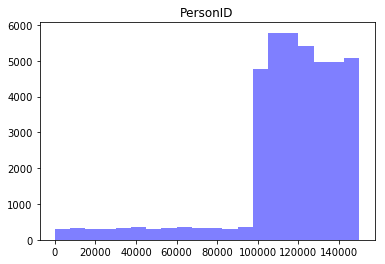

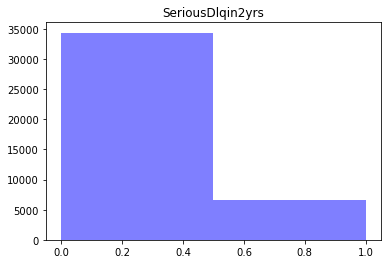

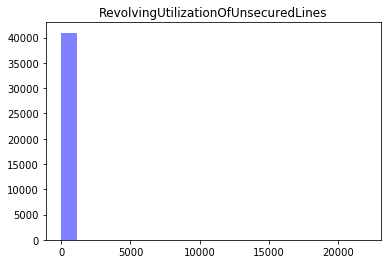

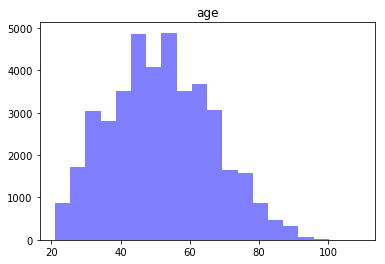

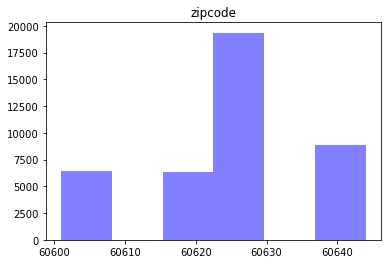

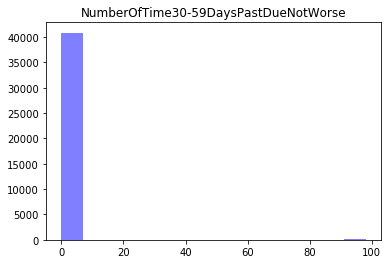

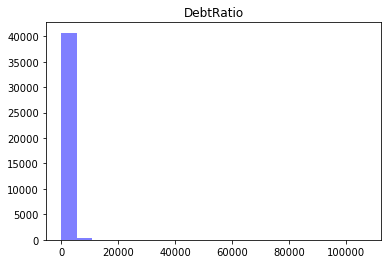

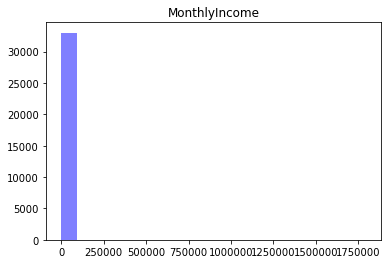

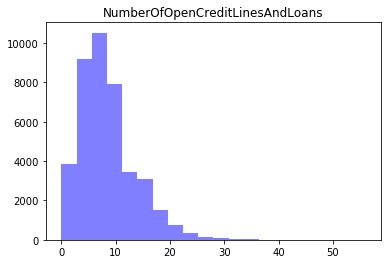

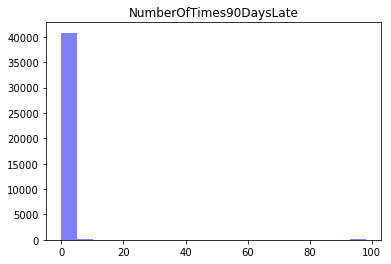

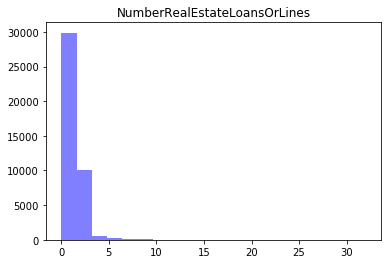

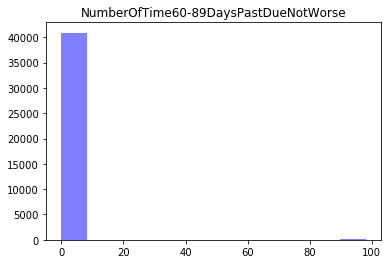

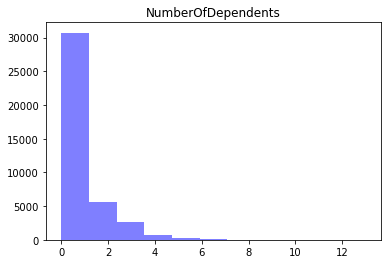

In [4]:
ppln.see_histograms(credit_df)

In [5]:
ppln.summary_by_objective(credit_df)

SeriousDlqin2yrs,0,1
PersonID,123480.465723,75895.021450
RevolvingUtilizationOfUnsecuredLines,6.821758,4.059138
age,52.807419,45.843807
zipcode,60624.061025,60622.593505
NumberOfTime30-59DaysPastDueNotWorse,0.248197,2.361178
DebtRatio,339.135574,291.567939
MonthlyIncome,6776.748201,5594.740774
NumberOfOpenCreditLinesAndLoans,8.494621,7.929909
NumberOfTimes90DaysLate,0.101698,2.071299
NumberRealEstateLoansOrLines,1.014188,0.980816


<Figure size 432x288 with 0 Axes>

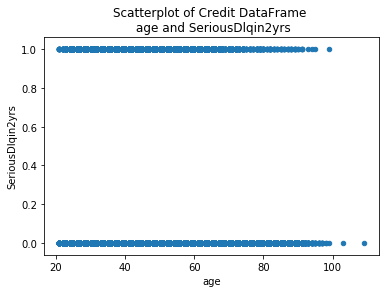

In [11]:
ppln.see_scatterplot(credit_df, 'age')

<Figure size 432x288 with 0 Axes>

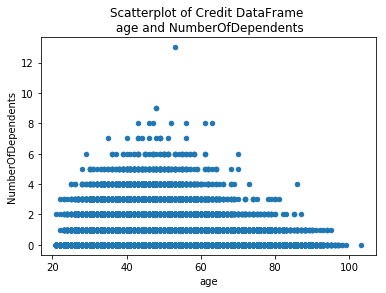

In [12]:
ppln.see_scatterplot(credit_df, 'age', 'NumberOfDependents')

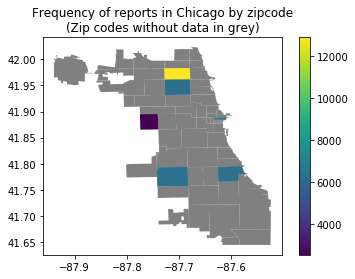

In [16]:
ppln.map(credit_df, zip_gdf, count = True)

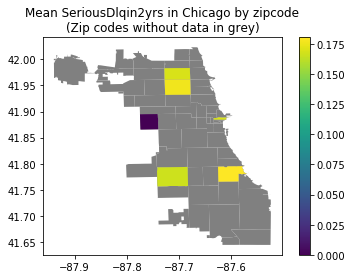

In [17]:
ppln.map(credit_df, zip_gdf)

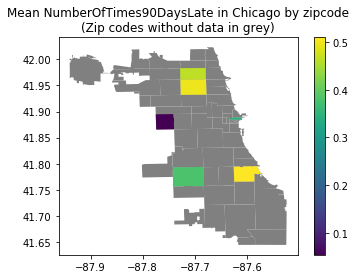

In [22]:
ppln.map(credit_df, zip_gdf, 'NumberOfTimes90DaysLate', 'mean')

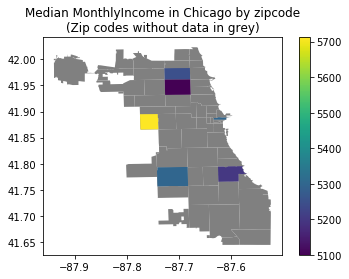

In [24]:
ppln.map(credit_df, zip_gdf, 'MonthlyIncome', 'median')